<center><h1 style="color: pink">  Airbnb </h1>


In [5]:
import pandas as pd


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/azebabrha/Downloads/airbnb_2.csv')

# Preview the first 5 rows
df.head(100)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,18/06/2019,1.05,2,9
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,7/07/2019,0.71,1,198
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,9/10/2018,0.11,1,365
98,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,1/05/2019,0.27,2,364


<b> How many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and which Neighbourhood Groups has the largest number of Airbnb Listings </b>

<p>

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b>The % listings that each Neighbourhood Group contains. </b>


In [ ]:
listing_percentages = (listing_counts / listing_counts.sum()) * 100


In [22]:
listing_proportions = df['neighbourhood_group'].value_counts(normalize=True)

print("Decimal Proportions of Listings per Neighbourhood Group:")
print(listing_proportions)


Decimal Proportions of Listings per Neighbourhood Group:
neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64


<b> This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>



In [29]:
df['Revenue'] = df['price'] * df['number_of_reviews']

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365,1341
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355,10125
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194,24030
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0,720


<b>  Bar Plot that shows which Neighbourhood Group has the highest average revenues.</b>


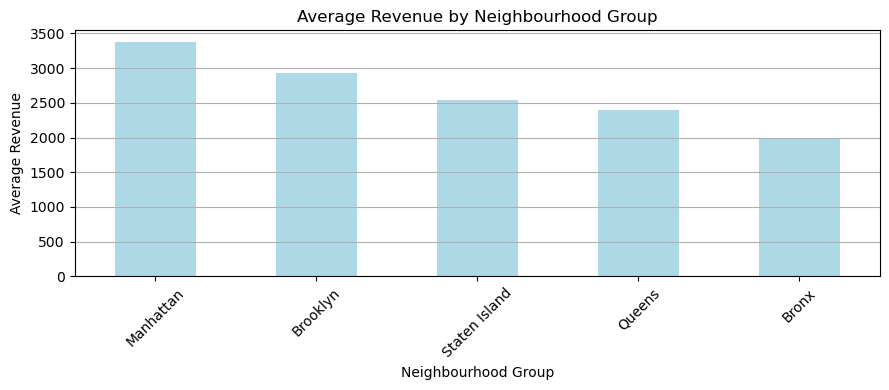

In [45]:
import matplotlib.pyplot as plt

avg_revenue = df.groupby('neighbourhood_group')['Revenue'].mean().sort_values(ascending=False)

ax = avg_revenue.plot(kind='bar', figsize=(9, 4), color='lightblue')
ax.set_title('Average Revenue by Neighbourhood Group')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


<b> The Airbnb Dataframe to include only the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`. 
    
identify the `top 3 Revenue Generating Neighborhoods` within each of the `three Neighbourhood_Groups`. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

In [53]:
filtered_df = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

grouped_revenue = (
    filtered_df
    .groupby(['neighbourhood_group', 'neighbourhood'])['Revenue']
    .sum()
    .reset_index()
)

top3_by_group = (
    grouped_revenue
    .sort_values(['neighbourhood_group', 'Revenue'], ascending=[True, False])
    .groupby('neighbourhood_group')
    .head(3)
    .reset_index(drop=True)
)

print(top3_by_group)


  neighbourhood_group       neighbourhood   Revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2            Brooklyn            Bushwick   4762224
3           Manhattan              Harlem   8598692
4           Manhattan      Hell's Kitchen   8238991
5           Manhattan        East Village   7574535
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


<b> The Airbnb Dataframe filter to include only these neighbourhoods. 
    
The <b>`top average revenue generating room type`</b> for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>



  

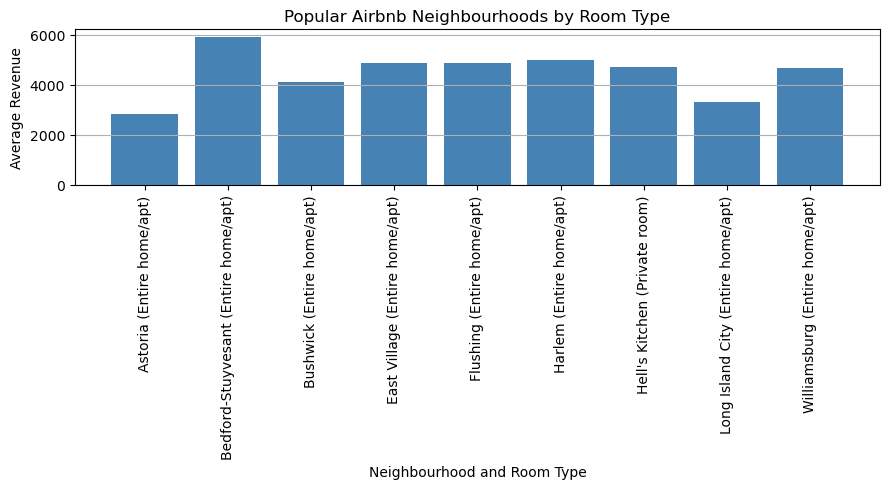

In [85]:
import matplotlib.pyplot as plt

top_neighborhoods = top3_by_group['neighbourhood'].tolist()

filtered_df = df[df['neighbourhood'].isin(top_neighborhoods)]

avg_revenue_by_room = (
    filtered_df
    .groupby(['neighbourhood', 'room_type'])['Revenue']
    .mean()
    .reset_index()
)

top_room_types = (
    avg_revenue_by_room
    .sort_values(['neighbourhood', 'Revenue'], ascending=[True, False])
    .groupby('neighbourhood')
    .head(1)
    .reset_index(drop=True)
)

top_room_types['label'] = top_room_types['neighbourhood'] + ' (' + top_room_types['room_type'] + ')'

# Step 5: Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(top_room_types['label'], top_room_types['Revenue'], color='steelblue')
plt.title('Popular Airbnb Neighbourhoods by Room Type')
plt.xlabel('Neighbourhood and Room Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
